In [3]:
import math

inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = (inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias)
output

4.8

In [4]:
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [
    # Neuron 1:
    inputs[0]*weights1[0] +
    inputs[1]*weights1[1] +
    inputs[2]*weights1[2] +
    inputs[3]*weights1[3] + bias1,

    # Neuron 2:
    inputs[0]*weights2[0] +
    inputs[1]*weights2[1] +
    inputs[2]*weights2[2] +
    inputs[3]*weights2[3] + bias2,

    # Neuron 3:
    inputs[0]*weights3[0] +
    inputs[1]*weights3[1] +
    inputs[2]*weights3[2] +
    inputs[3]*weights3[3] + bias3,
]

output

[4.8, 1.21, 2.385]

In [11]:
### Use loop iteration

weights = [[0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

# Output of current layer
layer_output = []


# For each neuron
for neuron_weights, neuron_bias in zip(weights, biases):
    # Zeroed output of given neuron
    neuron_output = 0
    # For each input and weight ot the neuron
    for n_input, weight in zip(inputs, neuron_weights):
        # Multiply this input by associated weight
        # and add to the neuron's output variable
        neuron_output += n_input*weight

    # Add bias
    neuron_output += neuron_bias
    #Put neuron's result to the layer's output list
    layer_output.append(neuron_output)

layer_output

[4.8, 1.21, 2.385]

In [4]:
import numpy as np
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0
outputs = np.dot(weights, inputs) + bias

outputs.item()


4.8

In [5]:
inputs = np.array([1, 2, 3, 2.5])
weights = [[0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

outputs = np.dot(weights, inputs) + bias
outputs

array([4.8  , 0.21 , 3.885])

In [15]:
a = [1, 2, 3]
np.array([a])

array([[1, 2, 3]])

In [10]:
np.expand_dims(a, axis=0)

array([[2, 3, 1]])

In [12]:
b = [2, 3, 4]
b = np.array([b]).T
b

array([[2],
       [3],
       [4]])

In [16]:
np.dot(a, b)

array([20])

In [17]:
inputs = [[1.0, 2.0, 3.0, 2.5],
 [2.0, 5.0, -1.0, 2.0],
 [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

layer_output = np.dot(inputs, np.array(weights).T) + biases
layer_output

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

In [20]:
layer_output.shape


(3, 3)

In [22]:
weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer2_output = np.dot(layer_output, np.array(weights2).T) + biases2
layer2_output

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

In [23]:
weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13],
            [-0.44, 0.73, -0.13],
            [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5, 2.5, 3]

layer2_output = np.dot(layer_output, np.array(weights2).T) + biases2
layer2_output

array([[ 0.5031 , -1.04185, -2.03875,  0.96125,  1.46125],
       [ 0.2434 , -2.7332 , -5.7633 , -2.7633 , -2.2633 ],
       [-0.99314,  1.41254, -0.35655,  2.64345,  3.14345]])

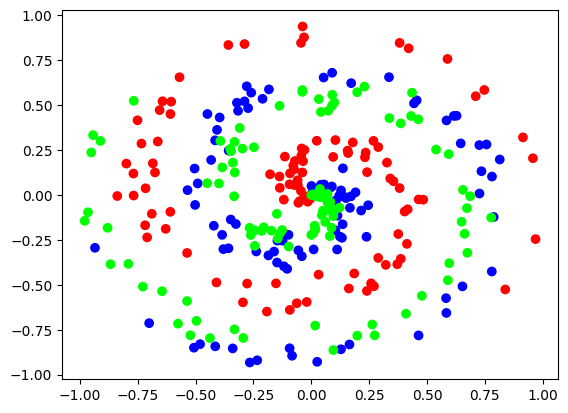

In [29]:
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()
X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()



In [32]:
class Layer_Dense:

    def __init__(self, n_inputs, n_neurons):
        # `np.random.randn` produces a Gaussian distribution with a mean of 0 and a variance of 1, which means that it'll generate random numbers, positive and negative, centered at 0 and with the mean value close to 0.
        # In general, neural networks work best with values between -1 and +1. So this `np.random.randn` generates values around those numbers.
        # Multiply this Gaussian distribution for the weights by `0.01` to generate numbers that are a couple of magnitudes smaller. Otherwise, the model will take more time to fit the data during the training process as starting values will be disproportionately large compared to the updates being made during training. The idea here is to start a model with non-zero values small enough that they won't affect training. This way, we have a bunch of values to begin working with, but hopefully none too large or as zeros.
        # `np.random.randn` takes dimension sizes as parameters and creates output array with this shape.
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [53]:
X, y = spiral_data(samples=100, classes=3)
X.shape, y.shape


((300, 2), (300,))

In [54]:
dense1 = Layer_Dense(2, 3)
dense1.forward(X)

dense1.output.shape, dense1.output[:5]

((300, 3),
 array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-6.6135792e-05, -2.3707229e-04, -2.4098932e-04],
        [-3.1392541e-05, -2.2257167e-04, -4.3131242e-04],
        [ 2.3084007e-05, -1.4214433e-04, -5.6358275e-04],
        [-2.0369441e-04, -8.0478768e-04, -9.5713802e-04]], dtype=float32))

### ReLU Activation Function


In [55]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

output = []

for i in inputs:
    if i > 0:
        output.append(i)
    else:
        output.append(0)

output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [57]:
# This can be written more simply, as we just need to take the largest of two values: 0 or neuron value
output1 = []
for i in inputs:
    output1.append(max(0, i))

output1

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [60]:
# using NumPy
np_output = np.maximum(0, inputs)
np_output

array([0. , 2. , 0. , 3.3, 0. , 1.1, 2.2, 0. ])

In [61]:
# ReLU activation class

class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from input
        self.output = np.maximum(0, inputs)


In [66]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through activation function
# Takes in output from previous layer
activation1.forward(dense1.output)

activation1.output.shape, activation1.output[:5]

((300, 3),
 array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [8.8871246e-05, 1.8308967e-04, 0.0000000e+00],
        [2.0995355e-04, 3.5862427e-04, 0.0000000e+00],
        [3.1263151e-04, 5.4185395e-04, 0.0000000e+00],
        [4.2919873e-04, 6.4298225e-04, 0.0000000e+00]], dtype=float32))

# Softmax Function

Also known as normalized exponential function, converts a vector of ``K`` real numners into a probability distribution of ``K`` possible outcomes.
The softmax function takes as input a vector ``z`` of ``K`` real numbers, and normalizes it into a probability distribution consisting of ``K`` probabilities proportional to the exponentials of the input numbers. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval ``(0, 1)``, and the components will add up to 1, so that they can interpreters as probabilities. Furthermore, the larget input components will correspond to larger probabilities.

### Why exponentiation?
Exponentiation serves multiple purposes. To calculate the probabilities, we need non-negative values. Imagine that output as [4.8, 1.21, -2.45] - even after normalization, the last value will still be negative since we'll just divide all of them by their sum. A negative probablity (or confidence) does not make much sense. An exponential value of any number is always non-negative - it returns 0 for negative infinity, 1 for input of ``0``, and increases for positive values

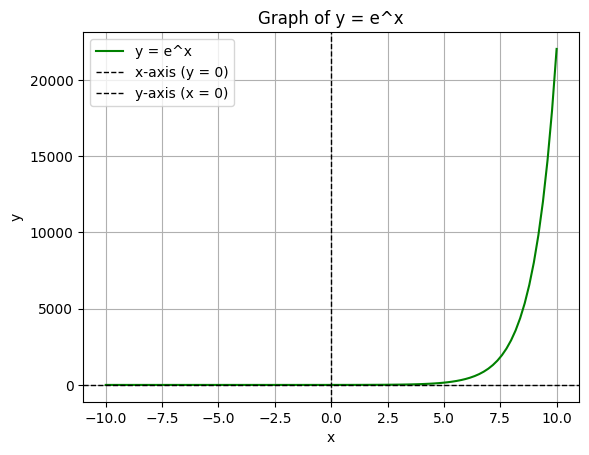

In [74]:
x = np.linspace(-10, 10, 100) # generates 100 points between -2 and 2

# compute y = e^x
y = np.exp(x)

# create the plot
plt.plot(x, y, label="y = e^x", color="green")

# Highlight the x-axis (y = 0)
plt.axhline(0, color="black", linewidth=1, linestyle="--", label="x-axis (y = 0)")

# Highlight the y-axis (x = 0)
plt.axvline(0, color="black", linewidth=1, linestyle="--", label="y-axis (x = 0)")

# add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of y = e^x")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

plt.show()

In [69]:
import math
# Values from the previous output when we described
# what a neural network is
layer_outputs = [4.8, 1.21, 2.385]

# e - mathematical cosntant, we use E here to match a common coding
# style where constants are uppercased
E = math.e

# for each value in a vector, calculate the exponential value
exp_values = []

for output in layer_outputs:
    exp_values.append(E ** output)

exp_values

[121.51041751873483, 3.353484652549023, 10.859062664920513]

In [70]:
sum(exp_values)

135.72296483620437

The exponential function is a monotomic function. This means that, with higher input values, outputs are also higher, so we won't change the predicted class after applying it while making sure that we get non-negative values. It also adds stability to the result as the normalized exponentiation is more about the diferrence between numbers than their magnitudes. Once we've exponentiated, we want to convert these numbers to a pobability distribution (converting the values into the vector of confidense, one for each class, which add up to `1` for everything in the vector.) What that means is that we're about to performa normalization where we take a given value and divide it by the sum of all the values. Since each output value normalizes to a faction of the sum, all of the values are now in the range of ``0`` and ``1`` and add up to `1` - they share the probability of 1 between themselves.

In [77]:
# Now normalizze values
norm_base = sum(exp_values) # sum of all exponentiated values
norm_values = []

for value in exp_values:
    norm_values.append(value / norm_base)

print(f"Normalized exponentiated values: {norm_values}")
print(f"Sum of normalized values: {sum(norm_values)}")

Normalized exponentiated values: [0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
Sum of normalized values: 0.9999999999999999


# Using NumPy for Softmax

In [78]:
exp_values = np.exp(layer_outputs)
exp_values

array([121.51041752,   3.35348465,  10.85906266])

In [79]:
# normalize values
norm_values_np = exp_values / np.sum(exp_values)
norm_values_np

array([0.89528266, 0.02470831, 0.08000903])

In [80]:
sum(norm_values_np)

np.float64(0.9999999999999999)

To train in batches, we need to convert this functionality to accept layer outputs in batches

In [85]:
inputs = [[1.0, 2.0, 3.0, 2.5],
            [2.0, 5.0, -1.0, 2.0],
            [-1.5, 2.7, 3.3, -0.8]]

# Get normalized probabilities
exp_values = np.exp(inputs)

# normalize them for each sample
probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
probabilities

array([[0.06414769, 0.17437149, 0.47399085, 0.28748998],
       [0.04517666, 0.90739747, 0.00224921, 0.04517666],
       [0.00522984, 0.34875873, 0.63547983, 0.0105316 ]])

### Illustrate Axis

In [88]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
                            [8.9, -1.81, 0.2],
                            [1.41, 1.051, 0.026]])

print('sum without axis')
np.sum(layer_outputs).item()

sum without axis


18.172

In [89]:
print("This is identical to the above sine default is None")
np.sum(layer_outputs, axis=None).item()

This is identical to the above sine default is None


18.172

With no axis specified, we are just summing all of the values, even if they're in varying dimensions. Next, `axis=0`. this means sum row-wise, along axis `0`. In other words, the output has the same size as this axis, as at each of the positions of this output, the values from all the other dimensions at this position are summed to form it. In the case of our 2D array, where we have only a single other dimension, the columns , the output vector will sum these columns.

In [94]:
print('another way to think of it w/ a matrix == axis 0: columns:')
np.sum(layer_outputs, axis=0)

another way to think of it w/ a matrix == axis 0: columns:


array([15.11 ,  0.451,  2.611])

In [95]:
np.sum(layer_outputs, axis=1)

array([8.395, 7.29 , 2.487])

In [96]:
print("Sum axis 1, but keep the same dimensions as input:")
np.sum(layer_outputs, axis=1, keepdims=True)

Sum axis 1, but keep the same dimensions as input:


array([[8.395],
       [7.29 ],
       [2.487]])

# Softmax Activation

In [97]:
np.max(inputs, axis=1, keepdims=True)

array([[3. ],
       [5. ],
       [3.3]])

In [105]:
class Activation_Softmax:

    # forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities


There are two main pervasive challenges with neural networks: "dead neurons" and very large (referred to as "exploding" values). "Dead" neurons and enormous numbers can wreak havoc down the line and render a network useless overtime. The exponential function used in softmax activation is one of the sources of exploding values.


In [99]:
np.exp(10).item()

22026.465794806718

In [100]:
np.exp(100).item()

2.6881171418161356e+43

In [101]:
np.exp(1000).item()

C:\Users\linho\AppData\Local\Temp\ipykernel_11440\2809462821.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000).item()


inf

It doesn't take a very large number, in this case, a mere 1,000 to cayse an overflow error. We know the expoentnial function tends toward `0` as its inputs value approaches negative infinity, and the output is `1` when the input is `0`

In [103]:
np.exp(-np.inf).item(), np.exp(0).item()

(0.0, 1.0)

We can use this property to prevent the exponential function from overflowing. Suppose we subtract the maximum value from a list of input values. We would then change the output values to always be in a range from some negative value up to 0, as the largest number subtracted by itself returns 0, and any smaller number subtracted by it will result in a negative number - exactly the range discussed above. With Softmax, thanks to normalization, we can subtract any value from all of the inputs, and it will not change the output:

In [123]:
softmax = Activation_Softmax()

input = np.array([[1, 2, 6]])
softmax.forward(input)
softmax.output.shape, softmax.output

((1, 3), array([[0.00657326, 0.01786798, 0.97555875]]))

In [124]:
input1 = input - np.max(input, axis=1, keepdims=True)
input1,

(array([[-5, -4,  0]]),)

In [125]:
softmax.forward(input1)
softmax.output,

(array([[0.00657326, 0.01786798, 0.97555875]]),)

### What happens if we divide the layer's output data, [1, 2, 6], for example, by 2?

The output confidences change due to the nonlinearity nature of the exponentiation. This is one example of why we need to scale all of the input data to a neural network in the same way.

In [126]:
input2 = input / 2
input2

array([[0.5, 1. , 3. ]])

In [127]:
softmax.forward(input2)
softmax.output,

(array([[0.06742536, 0.11116562, 0.82140902]]),)

Now, we can add another dense layer as the output layer, setting it to contain as many inputs as the previous layer had outputs and many outputs as our data includes classes. Then we can apply the softmax activation to the output of this new layer.

In [129]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features ( as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer)
activation2 = Activation_Softmax()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Make a forward pass through activation function
# it take the output of second dense layer here
activation2.forward(dense2.output)

activation2.output[:5], activation2.output.shape

(array([[0.33333334, 0.33333334, 0.33333334],
        [0.33333308, 0.3333332 , 0.33333376],
        [0.3333331 , 0.3333331 , 0.33333382],
        [0.33333296, 0.33333296, 0.3333341 ],
        [0.33333278, 0.33333278, 0.33333448]], dtype=float32),
 (300, 3))